In [ ]:
from pip._internal import main as pipmain
pipmain(['install', 'laspy'])
pipmain(['install', 'ipympl'])

In [7]:
import laspy
import numpy

In [12]:
las = laspy.read('als/plot_01.laz')
las

<LasHeader(1.2, <PointFormat(3, 0 bytes of extra dims)>)>

In [16]:
list(las.point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue']

In [18]:
# Grab all of the points from the file.
point_records = las.points

# Grab just the X dimension from the file, and scale it.

def scaled_x_dimension(las_file):
    x_dimension = las_file.X
    scale = las_file.header.scale[0]
    offset = las_file.header.offset[0]
    return(x_dimension*scale + offset)

scaled_x = scaled_x_dimension(las)
scaled_x

array([547126.022, 547124.386, 547123.899, ..., 547122.769, 547124.764,
       547125.44 ])

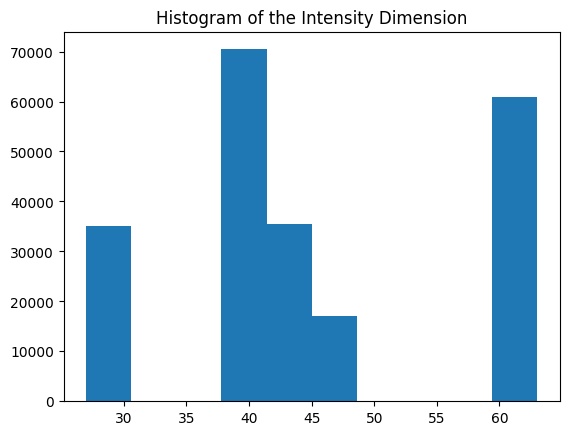

In [22]:
import matplotlib.pyplot as plt
plt.hist(las.intensity)
plt.title("Histogram of the Intensity Dimension")
plt.show()

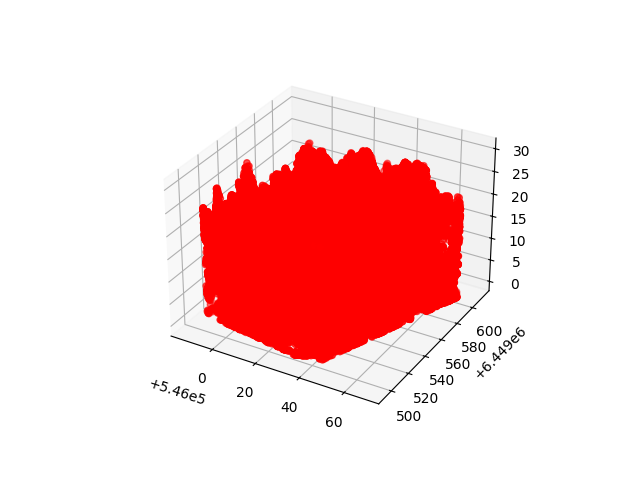

In [4]:
%matplotlib ipympl

import numpy as np
import laspy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# reading las file and copy points
las = laspy.read('plot_04.laz')
point_records = las.points.copy()

# getting scaling and offset parameters
las_scaleX = las.header.scale[0]
las_offsetX = las.header.offset[0]
las_scaleY = las.header.scale[1]
las_offsetY = las.header.offset[1]
las_scaleZ = las.header.scale[2]
las_offsetZ = las.header.offset[2]

# calculating coordinates
p_X = np.array((point_records['X'] * las_scaleX) + las_offsetX)
p_Y = np.array((point_records['Y'] * las_scaleY) + las_offsetY)
p_Z = np.array((point_records['Z'] * las_scaleZ) + las_offsetZ)

# plotting points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p_X, p_Y, p_Z, c='r', marker='o')
plt.show()